In [1]:
import random
import torch.nn as nn
import pandas as pd
import imageio
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# training data
SEED = 3047
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

x = torch.FloatTensor(20, 1).uniform_(-2, 2)
x = x.tolist()  # tensor to list
x.sort()  # sort from small to large
x = torch.tensor(x)  # list to tensor
y = torch.sin(2*x)+0.25*torch.randn(x.size())

x2 = torch.FloatTensor(200, 1).uniform_(-2, 2)
x2 = x2.tolist()
x2.sort()
x2 = torch.tensor(2*x2)
target = torch.sin(x2)

# validation data
SEED = 3047
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

validx = torch.FloatTensor(20, 1).uniform_(-2+0.05, 2+0.05)
validx = validx.tolist()  
validx.sort()  
validx = torch.tensor(validx)  
target1 = torch.sin(2*validx)
y1 = torch.sin(2*validx)+0.25*torch.randn(validx.size())

# test data
SEED = 3047
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

testx = torch.FloatTensor(200, 1).uniform_(-2, 2+0.05)
testx = testx.tolist()
testx.sort()
testx = torch.tensor(testx)
target2 = torch.sin(2*testx)
y2 = torch.sin(2*testx) + 0.25*torch.randn(testx.size())

In [3]:
class Net(torch.nn.Module):  
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)  
        self.predict = torch.nn.Linear(n_hidden1, n_output)  

    def forward(self, x):

        x = self.hidden1(x) 
        m=torch.nn.Sigmoid()
        x=m(x)
        x = self.predict(x)  
        return x

In [4]:
net = Net(n_feature=1, n_hidden1=21, n_output=1)

device = torch.device('cpu')

optimizer = torch.optim.AdamW(net.parameters(), lr=0.01,betas=(0.96,0.96))
loss_func = torch.nn.MSELoss().to(device)  
x = x.to(device)
y = y.to(device)

0.13669977


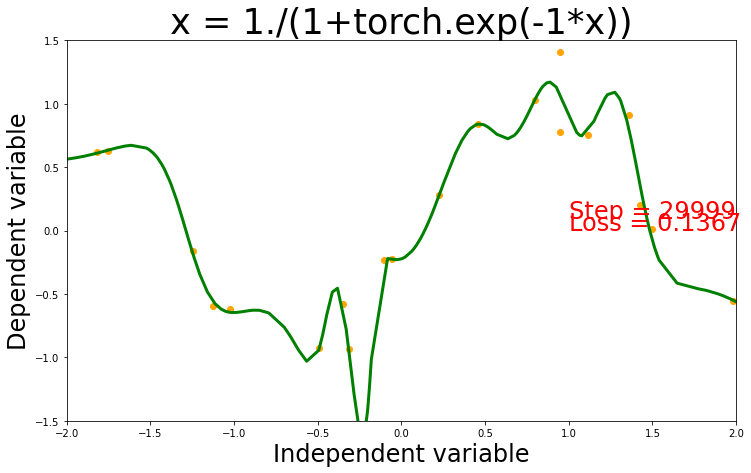

In [5]:
# CPU
my_images = []
fig, ax = plt.subplots(figsize=(12, 7)) 

epoch = 30000
para0 = torch.zeros(epoch) 
para1 = torch.zeros(epoch)  
para2 = torch.zeros(epoch) 

for t in range(epoch):
    prediction = net(x)  
    loss = loss_func(prediction,y)      
    optimizer.zero_grad()   
    loss.backward(retain_graph=True)        
    optimizer.step()       

    para0[t] = loss.data

    if(t) % 100 == 99:  
        validy = net(validx)  
        lossV = loss_func(validy, y1)
        para1[t] = lossV.data

plt.cla()
ax.set_title(' x = 1./(1+torch.exp(-1*x)) ', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 1.5)
ax.scatter(x.data.numpy(), y.data.numpy(), color="orange")

testy = net(testx)  
lossT = loss_func(testy, target2)

ax.plot(testx.data.numpy(), testy.data.numpy(), 'g-', lw=3)
ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
ax.text(1.0, 0, 'Loss = %.4f' % lossT.data.numpy(),fontdict={'size': 24, 'color':  'red'})

print(lossT.detach().numpy())

In [6]:
print(lossV.detach().numpy())
print(lossT.detach().numpy())

0.06505262
0.13669977


C:\Users\HP\AppData\Local\Temp/ipykernel_14876/2370958065.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  k=torch.range(1,epoch)


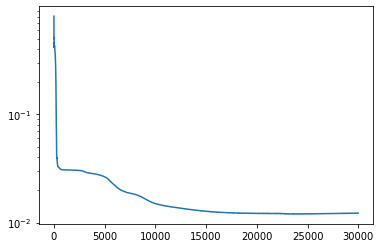

In [7]:
k=torch.range(1,epoch)
plt.plot(k, para0)
plt.yscale('log')
plt.show()

In [8]:
frame1 = pd.DataFrame(para0.data.numpy())
frame1.to_csv('E:/jupyterpath/D1/均布/siglt.csv', index=False)
frame1 = pd.DataFrame(para1.data.numpy())
frame1.to_csv('E:/jupyterpath/D1/均布/siglv.csv', index=False)
frame1 = pd.DataFrame(testy.data.numpy())
frame1.to_csv('E:/jupyterpath/D1/均布/sigtesty.csv', index=False)